## Statistical and Machine Learning, Fall 2024

### Week 4: Loss Function Derivation for Regression Problems	

### Instructor: Farhad Pourkamali 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/MATH6388Online/blob/main/Week4.ipynb)



### Linear model for regression
<hr style="border:2px solid gray">

* Given the training data set $\mathcal{D}=\{(\mathbf{x}_n,y_n)\}_{n=1}^N$ and a data point $\mathbf{x}\in\mathbb{R}^D$, the linear regression model takes the form

$$f(\mathbf{x};w_0,\mathbf{w})=w_0+w_1x_1+w_2x_2+\ldots+w_Dx_D=w_0+\mathbf{w}^T\mathbf{x}$$
    
* $\mathbf{w}\in\mathbb{R}^D$: weights or regression coefficients, $w_0$: intercept or bias term

* A more compact representation by defining $\mathbf{x}=[\color{red}{x_0=1},x_1,\ldots,x_D]$ and $\mathbf{w}=[w_0,w_1,\ldots,w_D]$ in $\mathbb{R}^{D+1}$

$$f(\mathbf{x};\mathbf{w})=\mathbf{w}^T\mathbf{x}=\langle \mathbf{w}, \mathbf{x}\rangle$$

### Building loss function with the likelihood approach

<hr style="border:2px solid gray">

* Let us assume the output distribution is Gaussian or normal with the mean value of $f(\mathbf{x};\mathbf{w})$ and fixed variance $\sigma^2$

$$p(y|\mathbf{x},\mathbf{w})=\mathcal{N}\big(y|f(\mathbf{x};\mathbf{w}), \sigma^2\big)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\big(-\frac{1}{2\sigma^2}(y-f(\mathbf{x};\mathbf{w}))^2\big)$$

* Thus, we can find the Negative Log Likelihood (NLL) function

$$\begin{align} NLL(\mathbf{w})=& -\sum_{n=1}^N\log p(y_n|\mathbf{x}_n,\mathbf{w})=-\sum_{n=1}^N\Big[\log\big(\frac{1}{\sqrt{2\pi\sigma^2}}\big) + \log\big(\exp(\ldots)\big)\Big]\\=&\frac{N}{2}\log(2\pi\sigma^2) + \frac{1}{\sigma^2}{\frac{1}{2}}\sum_{n=1}^N\big(y_n-f(\mathbf{x}_n;\mathbf{w})\big)^2\end{align}$$



### Loss function for linear regression
<hr style="border:2px solid gray">

* The NLL is equal (up to irrelevant constants) to the residual sum of squares (RSS)

$$\text{RSS}(\mathbf{w})=\frac{1}{2}\sum_{n=1}^N\big(y_n-\langle \mathbf{w},\mathbf{x}_n\rangle\big)^2=\frac{1}{2}\|\mathbf{y}-\mathbf{X}\mathbf{w}\|_2^2$$

where we have

$$\mathbf{y}=\begin{bmatrix}y_1\\y_2\\ \vdots\\y_N\end{bmatrix}\in\mathbb{R}^N, \;\mathbf{X}=\begin{bmatrix}\rule[.5ex]{1em}{0.4pt}\mathbf{x}_1^T \rule[.5ex]{1em}{0.4pt}\\ \vdots\\\rule[.5ex]{1em}{0.4pt}\mathbf{x}_N^T \rule[.5ex]{1em}{0.4pt}\end{bmatrix}\in\mathbb{R}^{N\times (D+1)}, \mathbf{w}=\begin{bmatrix}
w_0\\w_1\\ \vdots \\w_{D}\end{bmatrix}\in\mathbb{R}^{D+1}$$

* Optimization problem for model fitting

$$\underset{\mathbf{w}\in\mathbb{R}^{D+1}}{\operatorname{argmin}} \text{RSS}(\mathbf{w})$$


* The big picture

<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/ml_general.png?raw=true\" width=650>


* The RSS loss function is fundamentally derived under the assumption of homoscedastic noise, meaning that the variance of the noise is uniform across the input space. 
    * This uniformity implies that the error distribution remains constant, regardless of the specific input values. 
* However, in many real-world scenarios, the noise can be heteroscedastic, meaning it varies with different inputs. When the noise is input-dependent, using the RSS loss function becomes suboptimal, as it fails to account for the varying levels of uncertainty associated with different inputs. 


### Gradient
<hr style="border:2px solid gray">

* Extend the notion of derivatives to handle vector-argument functions
    + Given $f:\mathbb{R}^n\mapsto \mathbb{R}$, gradient is defined as 
    
    $$\nabla f=\begin{bmatrix}\frac{\partial f}{\partial x_1}\\ \vdots\\ \frac{\partial f}{\partial x_n} \end{bmatrix}$$
    
* Example: find $\nabla f$ where $f(\mathbf{x})=\mathbf{x}^T\mathbf{x}=\|\mathbf{x}\|_2^2$ and $\mathbf{x}=[x_1,\ldots,x_n]$


* Two useful identities (assume $\mathbf{a}$ and $\mathbf{A}$ are fixed) -- easy to prove by expanding out the terms and applying scalar calculus


$$\nabla(\mathbf{a}^T\mathbf{x})=\mathbf{a},\;\; \nabla(\mathbf{x}^T\mathbf{A}\mathbf{x})=(\mathbf{A}+\mathbf{A}^T)\mathbf{x}$$

### Gradient of RSS
<hr style="border:2px solid gray">


* Let us revisit the loss function for linear regression

$$\begin{align}\text{RSS}(\mathbf{w})=& \frac{1}{2}\|\mathbf{X}\mathbf{w}-\mathbf{y}\|_2^2=\frac{1}{2}(\mathbf{X}\mathbf{w}-\mathbf{y})^T(\mathbf{X}\mathbf{w}-\mathbf{y})\\
=&\frac{1}{2}(\mathbf{w}^T\mathbf{X}^T-\mathbf{y}^T)(\mathbf{X}\mathbf{w}-\mathbf{y})\\=&\frac{1}{2}(\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}-2\langle\mathbf{X}^T\mathbf{y},\mathbf{w}\rangle+\mathbf{y}^T\mathbf{y})\end{align}$$

* Hence 

$$\nabla \text{RSS}(\mathbf{w})=\frac{1}{2}(2\mathbf{X}^T\mathbf{X}\mathbf{w}-2\mathbf{X}^T\mathbf{y})=\mathbf{X}^T(\mathbf{X}\mathbf{w}-\mathbf{y})$$

### Ordinary least squares  (OLS)
<hr style="border:2px solid gray">


* Setting the gradient to zero gives 

$$\begin{align}\mathbf{X}^T\mathbf{X}\mathbf{w}=\mathbf{X}^T\mathbf{y}\\
\hat{\mathbf{w}}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\end{align}$$

The quantity $\mathbf{X}^\dagger=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$ is the (left) pseudo inverse of the (non-square) matrix $\mathbf{X}$

* If $\mathbf{X}$ is full rank (so the columns of $\mathbf{X}$ are linearly independent), then we have a unique global minimum

* Algorithmic issues
    * We should not compute the inverse of $\mathbf{X}^T\mathbf{X}$ due to numerical reasons (it may be ill-conditioned or singular)

    * Besides, the computational complexity of inverting such a matrix is about $O(D^3)$
        + Double the number of features, computational cost will be increased by a factor of 8
    
    * For large-scale problems, it may be impossible to even store $\mathbf{X}$ in the main memory
    
* Let's explore how to use the `LinearRegression` class from scikit-learn, the leading machine learning library for tasks outside of deep learning.
    * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    
    * The `LinearRegression` class defines the structure and methods for creating linear regression models.
    *  In code, you use `model = LinearRegression()` to create a new, blank linear regression model object.
    * Methods are actions the object can perform. The `fit` method is how you feed the model your data so it can learn the relationship between variables.
    * After fitting the model, you get attributes like `model.coef_` (the coefficients of your linear equation) and `model.intercept_`, which define the learned relationship.

In [1]:
# GDP data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("https://github.com/ageron/data/raw/main/lifesat/lifesat.csv")
                 
df.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [2]:
X = df['GDP per capita (USD)'].to_numpy()
y = df['Life satisfaction'].to_numpy()

print(X.shape, y.shape)

(27,) (27,)


In [3]:
X.reshape(-1,1)

array([[26456.38793813],
       [27287.08340093],
       [28384.98778463],
       [29932.49391006],
       [31007.76840654],
       [32181.15453723],
       [32238.15725928],
       [35638.42135118],
       [36215.44759073],
       [36547.73895598],
       [36732.03474403],
       [38341.30757041],
       [38992.14838075],
       [41627.12926943],
       [42025.61737306],
       [42404.39373816],
       [45856.62562648],
       [47260.80045844],
       [48210.03311134],
       [48697.83702825],
       [50683.32350972],
       [50922.35802345],
       [51935.60386182],
       [52279.72885136],
       [54209.56383573],
       [55938.2128086 ],
       [60235.7284917 ]])

In [4]:
# add the column of all 1's 

def add_column(X):
    '''
    add the column of all 1's 
    '''
    return np.concatenate(( np.ones((X.shape[0],1)), X.reshape(-1,1)), axis=1)

Xcon = add_column(X)

Xcon.shape


(27, 2)

In [5]:
Xcon

array([[1.00000000e+00, 2.64563879e+04],
       [1.00000000e+00, 2.72870834e+04],
       [1.00000000e+00, 2.83849878e+04],
       [1.00000000e+00, 2.99324939e+04],
       [1.00000000e+00, 3.10077684e+04],
       [1.00000000e+00, 3.21811545e+04],
       [1.00000000e+00, 3.22381573e+04],
       [1.00000000e+00, 3.56384214e+04],
       [1.00000000e+00, 3.62154476e+04],
       [1.00000000e+00, 3.65477390e+04],
       [1.00000000e+00, 3.67320347e+04],
       [1.00000000e+00, 3.83413076e+04],
       [1.00000000e+00, 3.89921484e+04],
       [1.00000000e+00, 4.16271293e+04],
       [1.00000000e+00, 4.20256174e+04],
       [1.00000000e+00, 4.24043937e+04],
       [1.00000000e+00, 4.58566256e+04],
       [1.00000000e+00, 4.72608005e+04],
       [1.00000000e+00, 4.82100331e+04],
       [1.00000000e+00, 4.86978370e+04],
       [1.00000000e+00, 5.06833235e+04],
       [1.00000000e+00, 5.09223580e+04],
       [1.00000000e+00, 5.19356039e+04],
       [1.00000000e+00, 5.22797289e+04],
       [1.000000

In [6]:
# solve the problem 

a = np.matmul(np.transpose(Xcon), Xcon)

b = np.matmul(np.transpose(Xcon), y)

theta = np.linalg.lstsq(a, b, rcond=None)[0] # Cut-off ratio for small singular values

print(theta)

[3.74904943e+00 6.77889970e-05]


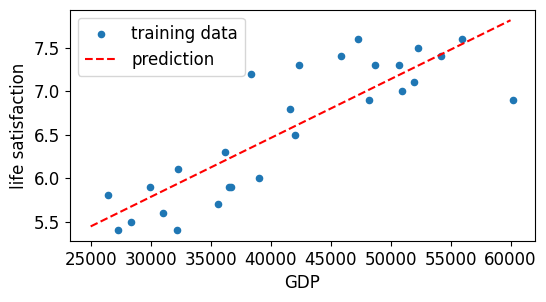

In [7]:
# plot the prediction model f

def f(X, theta):
    return np.matmul(X, theta)

plt.rcParams.update({'font.size': 12, "figure.figsize": (6,3)})
plt.scatter(X, y, s=20, label='training data')

X_test = np.array([25000, 60000])
y_test = f(add_column(X_test), theta)
plt.plot(X_test, y_test, 'r--', label='prediction')

plt.legend()
plt.xlabel('GDP')
plt.ylabel('life satisfaction')
plt.show()

In [8]:
# Revisit the GDP data 

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X.reshape(-1,1), y) # X should be a 2D array 

print(reg.intercept_, reg.coef_)

3.7490494273769075 [6.77889969e-05]


In [9]:
# Revisit the GDP data by preprocessing input features 

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

X_minmax = minmax.fit_transform(X.reshape(-1,1))

reg = LinearRegression()

reg.fit(X_minmax, y) # X should be a 2D array 

print(reg.intercept_, reg.coef_)

5.542501428448674 [2.28986761]


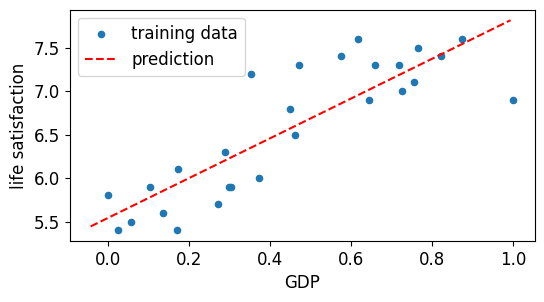

In [10]:
plt.rcParams.update({'font.size': 12, "figure.figsize": (6,3)})
plt.scatter(X_minmax, y, s=20, label='training data')

X_test = np.array([25000, 60000])
X_test_minmax = minmax.transform(X_test.reshape(-1,1))
y_test = reg.predict(X_test_minmax)
plt.plot(X_test_minmax, y_test, 'r--', label='prediction')

plt.legend()
plt.xlabel('GDP')
plt.ylabel('life satisfaction')
plt.show()